<a href="https://colab.research.google.com/github/zzaeyun/ESAA22-2/blob/main/%ED%8C%8C%EC%9D%B4%EC%8D%AC%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%EC%99%84%EB%B2%BD%EA%B0%80%EC%9D%B4%EB%93%9C_183to227.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

파이썬 머신러닝 완벽가이드 pg.183-227 (201-211 제외)

## CHAPTER 04
# **분류**


---
## **01 분류(Classification)의 개요**

지도학습: 명시적인 정답이 있는 데이터가 주어진 상태에서 학습하는 머신러닝 방식

분류(Classification)은 지도학습의 대표적인 유형
- 피처와 레이블값을 머신러닝 알고리즘으로 학습해 모델을 생성하고 새로운 데이터 값이 주어졌을 때 미지의 레이블 값을 에측하는 것

**분류에 사용하는 다양한 머신러닝 알고리즘**
- 베이즈 통계와 생성 모델에 기반한 나이브 베이즈
- 독립변수와 종속변수의 선형 관계성에 기반한 로지스틱 회귀
- 데이터 균일도에 따른 규칙 기반의 결정 트리
- 개별 클래스 간의 최대 분류 마진을 효과적으로 찾아주는 서포트 벡터 머신
- 근접 거리를 기준으로 하는 최소 근접 알고리즘
- 심층 연결 기반의 신경망
- 서로 다른 머신러닝 알고리즘을 결합한 앙상블


---
이번 장에서는 앙상블 방법을 집중적으로 다룸

앙상블이 정형 데이터의 예측 분석 영역에서는 높은 예측 성능을 보여주고 있음

앙상블은 서로 다른/같은 알고리즘을 결합, 일반적으로 사용하는 것은 결정 트리
- 배깅방식: 랜덤 포레스트
- 부스팅: 그래디언트 부스팅 
- 스태킹 기법

결정 트리: 사전 가공의 영향이 매우 적지만 예측 성능을 향상시키기 위해 복잡한 규칙 구조를 가져야 하며, 이로 인한 과적합(overfitting)이 발생하여 반대로 예측 성능이 저하될 수 있음
- 앙상블은 약한 학습기를 결합하여 예측 성능을 향상시키므로 결정 트리의 단점을 이용 및 보완




## **02 결정 트리**

데이터에 있는 규칙을 학습을 통해 자동으로 찾아내 트리 기반의 분류 규칙을 생성


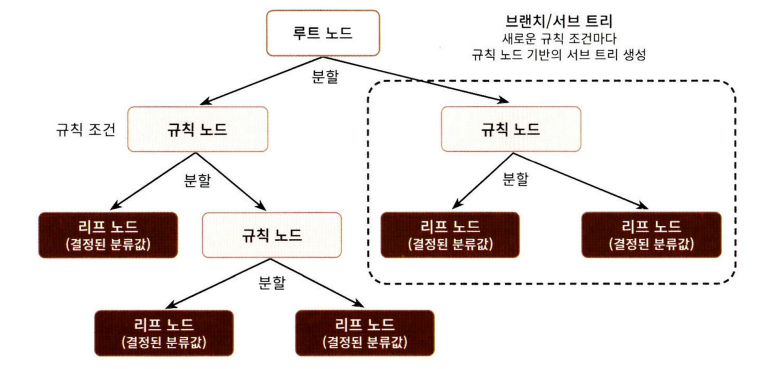

규칙 노드(Decision Node): 규칙 조건
리프 노드(Leaf Node): 결정된 클래스 값

규칙 조건을 만들 때마다 규칙 노드가 만들어지고 많은 규칙이 있다는 것은 분류를 결정하는 방식이 더욱 복잡해진다는 것으로 과적합으로 이어질 수 있으므로 주의해야함

그러므로 최대한 균일한 데이터 세트를 구성할 수 있도록 분할하는 것이 필요

### **결정 트리 모델의 특징**
- 정보의 '균일도'라는 룰을 기반으로 하여 알고리즘이 쉽고 직관적: 이에 기반하여 노드 파악과 시각화 표현이 가능
- 정보의 전처리 작업이 필요 없음

- 가장 큰 단점은 과적합으로 정확도가 떨어짐: 트리의 크기를 사전에 제한하는 튜닝 필요

### **결정 트리 파라미터**

- min_samples_split: 노드를 분할하기 위한 최소한의 샘플 데이터 수로 과적합을 제어하는 데 사용, 작게 설정할수록 과적함 가능성 증가
- min_samples_leaf: 말단 노드가 되기 위한 최소한의 샘플 데이터 수, 과적합 제어 용도
- max_features: 최적의 분할을 위해 고려할 최대 피처 개수
- max_depth: 트리의 최대 깊이를 규정
- max_leaf_nodes: 말단 노드의 최대 개수

### **결정 트리 모델의 시각화**
- Graphviz 패키지 사용

In [3]:
## using graphviz 
!apt-get -qq install -y graphviz && pip install -q pydot
import pydot
## 아래 있는것은 필수는 아닌데, 가끔 에러가 생길 때가 있어서, 그냥 같이 해줌. 
!apt-get install graphviz libgraphviz-dev pkg-config
!pip install pygraphviz
import pygraphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
pkg-config is already the newest version (0.29.1-0ubuntu2).
graphviz is already the newest version (2.40.1-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libgvc6-plugins-gtk libxdot4
0 upgraded, 8 newly installed, 0 to remove and 4 not upgraded.
Need to get 2,120 kB of archives.
After this operation, 7,128 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgtk2.0-common all 2.24.32-1ubuntu1 [125 kB]
Get:2 http://archive.ubuntu.com/ubuntu bion

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dt_clf=DecisionTreeClassifier(random_state=156)

iris_data=load_iris()
X_train, X_test, y_train, y_test=train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)

dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

In [11]:
from sklearn.tree import export_graphviz

export_graphviz(dt_clf, out_file='tree.dot', class_names=iris_data.target_names, 
                feature_names=iris_data.feature_names, impurity=True, filled=True)

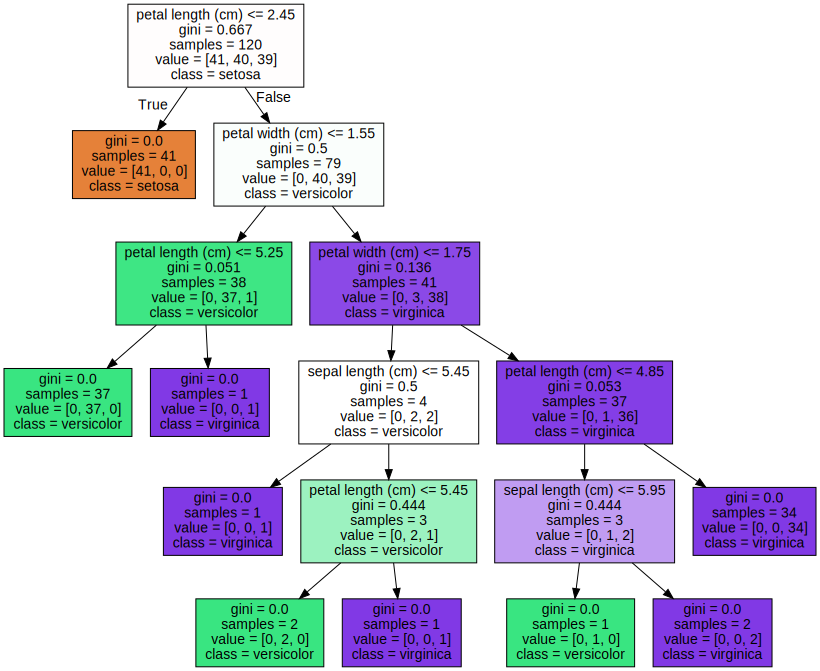

In [12]:
import graphviz

with open('tree.dot') as f:
  dot_graph=f.read()
graphviz.Source(dot_graph)


자식 노드가 없는 노드는 리프 노드: 최종 클래스 값이 결정
자식 노드가 있는 노드를 브랜치 노드: 자식을 만들기 위한 분할 규칙 조건을 가지고 있음
- petal length<= 2.45: 자식 노드를 만들기 위한 규칙 조건
- gini: 다음 value= [ ]로 주어진 데이터 분포에서의 지니 계수
- samples: 현 규칙에 해당하는 데이터 건수
- value= [ ]는 클래스 값 기반의 데이터 건수

트리 노드는 계속해서 클래스를 구분하기 위해 자식노드를 생성하므로 과적합되는 문제점을 가질 수 있음


---


그래서 결정 트리의 하이퍼 파라미터는 복잡한 트리가 생성되는 것을 막기위한 용도

- max_depth: 최대 트리 깊이를 제어
- min_samples_split: 자식 노드를 분할해 만들기 위한 최소한의 샘플 데이터 개수
- min_sampels_leaf: 클래스 결정 값이 되는 리프 노드가 될 수 있는 샘플 데이터 건수의 최솟값을 지정, 값을 키우면 리프 노드가 될 수 있는 조건을 완화
- 세 parameter 모두 tree를 간결하게 만들어줌

---

feature_importance_ 속성을 가져와 피처별로 중요도 값을 매핑하고 막대그래프로 표현

Feature importances:
[0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


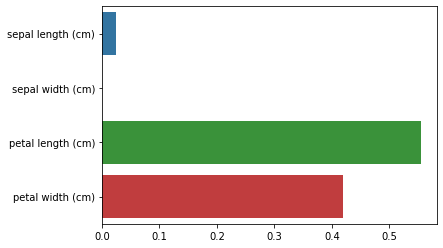

In [14]:
import seaborn as sns
import numpy as np
%matplotlib inline

#feature importance 추출
print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_,3)))

#feature별 importance 매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
  print('{0} : {1:.3f}'.format(name, value))

#feature importance를 column 별로 시각화하기
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

petal_length가 가장 피처 중요도가 높음

### **결정 트리 과적합(Overfitting)**
학습 데잍러를 분할해 예측을 수행하는 과정과 이로 인한 과적합 문제를 시각화

- make_classification( ): 피처 데이터 세트와 클래스 레이블 데이터 세트 반환

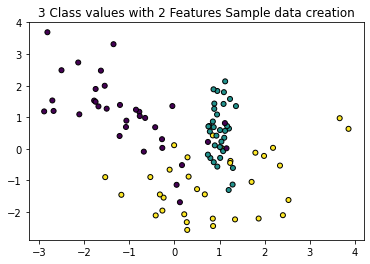

In [15]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title('3 Class values with 2 Features Sample data creation')

#2차원 시각화를 위해서 피처는 2개, 클래스는 3가지 유형의 분류 샘플 데이터 생성
X_features, y_labels=make_classification(n_features=2, n_redundant=0, n_informative=2, n_classes=3, n_clusters_per_class=1, random_state=0)

#그래프 형태로 2개의 피처로 2차원 좌표 시각화, 각 클래스 값은 다른 색깔로 표시됨
plt.scatter(X_features[:,0], X_features[:,1], marker='o', c=y_labels, s=25, edgecolor='k')



---


- 하이퍼 파라미터는 디폴트
- bisualize_boundary( )를 생성하여 예측하는 결정 기준을 색상과 경계로 나타냄

In [17]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

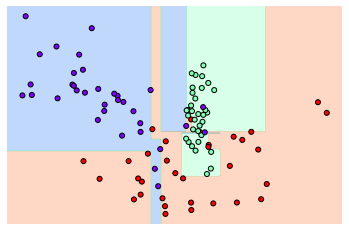

In [18]:
from sklearn.tree import DecisionTreeClassifier

dt_clf=DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

위처럼 분할이 자주 이렁나서 결정 기준 경계가 매우 많아져 복잡해지면 새로운 데이터 세트를 예측했을 때 정확도가 떨어짐

---
- min_samples_leaf=6으로 설정하여 리프 노드 생성 규칙 완화


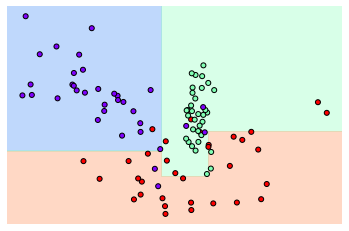

In [19]:
dt_clf=DecisionTreeClassifier(min_samples_leaf=6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

pg.211

## **03 앙상블 학습**
여러 개의 분류기(Classifier)를 생성하고 그 예측을 결합함으로써 보다 정확한 최종 예측을 도출하는 기법
- 정형 데이터 분류 시에는 앙상블이 뛰어난 성능
- 대표적인 알고리즘: 랜덤 포레스트, 그래디언트 부스팅 알고리즘
- 쉬운 사용과 다양한 활용도로 애용
- 그외에도 XGBoost, LightGBM, 스태킹

학습 유형
- 보팅(Voting): 서로 다른 알고리즘을 가진 분류기 결합
- 배깅(Bagging): 각각의 분류기가 모두 같은 유형의 알고리즘 기반, 데이터 샘플링을 서로 다르게 가져가면서 학습 수행해 보팅을 수행 -> 랜덤 포레스트
- 부스팅(Boosting): 순차적으로 학습을 수행하되, 예측이 틀린 데이터에 대해서는 올바르게 예측할 수 있도록 다음 분류기에게 가중치를 부여하면서 예측 진행

---




### **보팅 유형 - 하드보팅(Hard Voting)과 소프트 보팅(Soft Voting)**

**하드 보팅**
- 다수결 원칙
- 예측한 결괏값들중 다수의 분류기가 결정한 예측값을 최종 보팅 결괏값으로 선정

**소프트 보팅**
- 분류기들의 레이블 값 결정 확률을 모두 더하고 평균
- 이들 중 확률이 가장 높은 레이블 값을 최종 보팅 결괏값으로 선정

---



###**보팅 분류기(Voting Classifier)**

- 사이킷런은 보팅 방식의 앙상블을 구현한 VotingClassifier 클래스를 제공
- 보팅 방식의 앙상블을 이용해 위스콘신 유방안 데이터 세트를 예측 분석

In [21]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer=load_breast_cancer()

data_df=pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


VotingClassifier
- estimators: 리스트 값으로 보팅에 사용될 여러 개의 Classifier 객체들을 튜플 형식으로 입력 받음
- voting: 'hard', 'soft' (default='hard')

In [23]:
lr_clf=LogisticRegression()
knn_clf=KNeighborsClassifier(n_neighbors=8)

#개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기
vo_clf=VotingClassifier(estimators=[('LR',lr_clf), ('KNN', knn_clf)], voting='soft')

X_train, X_test, y_train, y_test=train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=156)

#VotingClassifier 학습/예측/평가
vo_clf.fit(X_train, y_train)
pred=vo_clf.predict(X_test)
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

#개별 모델의 학습/예측/평가
classifiers=[lr_clf, knn_clf]
for classifier in classifiers:
  classifier.fit(X_train, y_train)
  pred=classifier.predict(X_test)
  class_name=classifier.__class__.__name__
  print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test, pred)))

Voting 분류기 정확도: 0.9474
LogisticRegression 정확도: 0.9386
KNeighborsClassifier 정확도: 0.9386


- 보팅 분류기의 정확도가 조금 높게 나옴: 항상 높은 것은 아님
- 앙상블 방법은 전반적으로 다른 단일 ML 알고리즘보다 뛰어난 예측 성능을 가지는 경우가 많음
- ML 모델의 성능은 다양한 테스트 데이터에 의해 검증되므로 어떻게 높은 유연성을 가지고 현실에 대처할 수 있는가가 중요한 평가요소
- 결정 트리 알고리즘처럼 직관적인 분류 기준을 가지고 있찌만 예측 성능이 떨어지기 쉬운 단점을 가진 알고리즘을 보완하면서 효과를 극대화할 수 있음



---



##**04 랜덤 포레스트**

**랜덤 포레스트의 개요 및 실습**
- 배깅: 같은 알고리즘으로 여러 개의 분류기를 만들어 보팅으로 최종 결정
- 기반 알고리즈을 결정트리로하여 결정 트리의 쉽고 직관적인 장점을 가지고 있음
- 여러 개의 결정 트리 분류기가 전체 데이터에서 배깅 방식으로 각자의 데이터를 샘플링해 개별적으로 학습을 수행한 뒤 최종적으로 모든 분류기가 보팅을 통해 예측 결정
- 부트스트래핑 분할 방식: 여러 개의 데이터 세트를 중첩되게 분리


---
사이킷런의 RandomForestClassifier 클래스를 이용하여 랜덤 포레스트 기반의 분류를 사용자 행동 데이터 세트 사용


In [36]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                  columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) 
                                                                                         if x[1] >0 else x[0] ,  axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

def get_human_dataset( ):
    
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('/features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])
    
    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame생성. 
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv('/X_train.txt',sep='\s+', names=feature_name )
    X_test = pd.read_csv('/X_test.txt',sep='\s+', names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv('/y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv('/y_test.txt',sep='\s+',header=None,names=['action'])
    
    # 로드된 학습/테스트용 DataFrame을 모두 반환 
    return X_train, X_test, y_train, y_test

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test=get_human_dataset()

rf_clf=RandomForestClassifier(random_state=6)
rf_clf.fit(X_train, y_train)
pred=rf_clf.predict(X_test)
accuracy=accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.9284


**랜덤 포레스트 하이퍼 파라미터 및 튜닝**

- n_estimators: 랜덤 포레스트에서 결정 트리의 개수 지정, 디폴트는 10
- max_features: max_features 파라미터와 동일, 디폴트는 'auto', 'sqrt'이므로 전체 피처가 아닌 sqrt(전체 피처 개수)만큼 참조
- max_depth, min_samples_leaf: 과적합 개선을 위한 파라미터 

---

GridSearchCV를 이용하여 랜덤 포레스트의 하이퍼 파라미터 튜닝


In [38]:
from sklearn.model_selection import GridSearchCV

params={
    'n_estimators':[100],
    'max_depth':[6,8,10,12],
    'min_samples_leaf':[8,12,18],
    'min_samples_split':[8,16,20]
}

#RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf=RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv=GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('최적의 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적의 하이퍼 파라미터:
 {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도: 0.9180


n_estimators를 300으로 증가

In [41]:
rf_clf1=RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_leaf=8,
                               min_samples_split=8, random_state=0)
rf_clf1.fit(X_train, y_train)
pred=rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도: 0.9165


피처 중요도를 막대그래프로 시각화

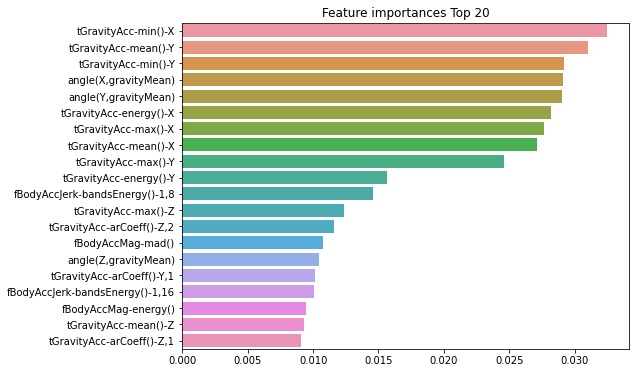

In [43]:
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

ftr_importances_values=rf_clf1.feature_importances_
ftr_importances=pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top20=ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

## **05 GBM(Gradient Boosting Machine)**

**GBM의 개요 및 실습**
- 부스팅: 여러 개의 약한 학습기를 순차적으로 학습-예측하면서 잘못 예측한 데이터에 가중치 부여를 통해 오류를 개선해 나가면서 학습하는 방식

1. 첫 번째 약한 학습기가 분류 기준 1로 +와-를 분류
2. 오류 데이터에 대해서 가중치 값 부여
3. 두 번째 약한 학습기가 분류 기준2로 +와-를 분류
4. 잘못 분류된 이 - 오류 데이터에 대해 다음 약한 학습기가 잘 분류할 수 있게 더 큰 가중치 부여
5. 세 번째 약한 학습기가 분류 기준3로 +와-를 분류
6. 개별 약한 학습기보다 높은 정확도

---

- GBM(Gradient Boost Machine)로 에이다 부스트와 유사하나 가중치 업데이트를 경사 하강법을 이용하는 것이 킄ㄴ 차이
- GBM은 CART 기반의 다른 알고리즘과 마찬가지로 분류와 회귀 가능
- 사이킷런의 GradientBoostingClassifier 클래스 

In [44]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test=get_human_dataset()

#GBM 수행 시간 측정
start_time=time.time()

gb_clf=GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train, y_train)
gb_pred=gb_clf.predict(X_test)
gb_accuracy=accuracy_score(y_test, gb_pred)

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))
print('GBM 수행 시간: {0:.1f}초'.format(time.time()-start_time))

GBM 정확도: 0.9386
GBM 수행 시간: 860.8초


**GBM 하이퍼 파라미터 및 튜닝**

- loss: 경사 하강법을 사용할 비용 함수 지정
- learning_rate: GBM이 학습을 진행할 때마다 적용하는 학습률
- n_estimators: weak learner의 개수, 맣을 수록 예측 성능이 일정수준까지 좋아질 수 있음
- subsample: weak learner가 학습에 사용하는 데이터 샘플링 비율

In [ ]:
#PC기준 30분에서 1시간 소요되므로 코드는 돌리지 않겠습니다.

from sklearn.model_selection import GridSearchCV

params={
    'n_estimators':[100,500],
    'learning_rate':[0.05, 0.1]
}
grid_cv=GridSearchCV(gb_clf, param_gred=params, cv=2, verbose=1)
grid_cv.fit(X_train, y_train)
print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도 {0:.4f}'.format(grid_cv.best_score_))

In [ ]:
#GridSearchCV를 이용해 쵲거으로 학습된 estimator로 예측 수행
gb_pred=grid_cv.best_estimator_.predict(X_test)
gb_accuracy=accuracy_score(y_test, gb_pred)
print('GBM 정확도: {0:.4f}'.format(gb_accuracy))